In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
pd.set_option("display.max_columns", 50)

In [3]:
df = pd.read_excel('WQ_updated_with_WQI.xlsx')

In [4]:
df.head()

,WRIS ID,PH,EC,TOT_ALKALINITY,CA,MG,NA,FE,CHLORIDE,SULPHATE,NITRATE,FLUORIDE,TDS,Total_hardness,WQI,GRADE,QUALITY
0,W23881,8.34,355.0,160.0,22.0,18.225,25.70,1.288,17.725,3.21,3.63,0.37,217.748,129.7225,52.765156,C,Poor
1,W38814,8.46,596.0,205.0,14.0,20.655,75.67,0.125,38.995,46.22,2.46,0.24,360.745,119.6855,81.601765,D,Very poor
2,W24111,8.24,429.0,150.0,10.0,32.805,23.32,0.183,31.905,24.15,0.06,0.68,243.370,159.5005,60.979152,C,Poor
3,W38806,8.21,1077.0,165.0,18.0,70.470,85.95,0.120,124.075,47.48,184.20,0.16,681.918,333.9270,153.279010,E,Unsuitable
4,W38807,8.17,394.0,135.0,14.0,34.020,15.24,0.648,38.995,8.22,0.30,0.62,233.172,174.4820,57.871346,C,Poor


In [5]:
df_x = df.drop(columns = ['WRIS ID', 'WQI', 'GRADE', 'QUALITY'])
df_x
df_y = df['GRADE']
df_y

0       C
1       D
2       C
3       E
4       C
       ..
2260    B
2261    A
2262    B
2263    A
2264    A
Name: GRADE, Length: 2265, dtype: object

In [6]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=101)

In [9]:
params_dtree = [{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 
                 'max_features': ['auto', 'sqrt', 'log2']}]
dtree_gs = GridSearchCV(dtree, params_dtree, cv=5, verbose=3, scoring='accuracy')

dtree_gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=gini, max_features=auto, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_features=auto, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_features=auto, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_features=auto, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_features=auto, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_features=auto, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_features=auto, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_features=auto, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_features=auto, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_features=auto, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_features=sqrt, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'splitter': ['best', 'random']}],
             scoring='accuracy', verbose=3)

In [10]:
#save best model
dtree_best = dtree_gs.best_estimator_
print(dtree_gs.best_params_)

{'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}


In [11]:
pred_dtree = dtree_best.predict(X_test)
print(accuracy_score(y_test,pred_dtree))
pd.crosstab(y_test,pred_dtree) 

0.9308823529411765


col_0,A,B,C,D,E
GRADE,,,,,
A,25,4,0,0,0
B,3,76,4,0,0
C,0,9,65,8,0
D,0,0,5,51,0
E,0,0,0,14,416


### Applying SMOTE to tackle imbalanced data

In [12]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [13]:
X_train_sm, y_train_sm = sm.fit_resample(X_train.astype('float'),y_train)

In [14]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_sm))

Before SMOTE : Counter({'E': 1007, 'C': 173, 'B': 170, 'D': 150, 'A': 85})
After SMOTE : Counter({'E': 1007, 'C': 1007, 'D': 1007, 'B': 1007, 'A': 1007})


In [15]:
params_dtree = [{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 
                 'max_features': ['auto', 'sqrt', 'log2']}]
dtree_gs = GridSearchCV(dtree, params_dtree, cv=5, verbose=3, scoring='accuracy')

dtree_gs.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=gini, max_features=auto, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_features=auto, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_features=auto, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_features=auto, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_features=auto, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_features=auto, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_features=auto, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_features=auto, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_features=auto, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_features=auto, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_features=sqrt, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'splitter': ['best', 'random']}],
             scoring='accuracy', verbose=3)

In [16]:
#save best model
dtree_best = dtree_gs.best_estimator_#check best n_estimators value
print(dtree_gs.best_params_)

{'criterion': 'gini', 'max_features': 'log2', 'splitter': 'best'}


In [17]:
pred_dtree = dtree_best.predict(X_test)
print(accuracy_score(y_test,pred_dtree))
pd.crosstab(y_test,pred_dtree) 

0.9426470588235294


col_0,A,B,C,D,E
GRADE,,,,,
A,25,4,0,0,0
B,4,75,4,0,0
C,0,6,70,6,0
D,0,0,2,52,2
E,0,0,1,10,419


In [18]:
print(classification_report(y_test,pred_dtree))

              precision    recall  f1-score   support

           A       0.86      0.86      0.86        29
           B       0.88      0.90      0.89        83
           C       0.91      0.85      0.88        82
           D       0.76      0.93      0.84        56
           E       1.00      0.97      0.98       430

    accuracy                           0.94       680
   macro avg       0.88      0.90      0.89       680
weighted avg       0.95      0.94      0.94       680



### Evaluating the model

In [19]:
random_prob = [0 for _ in range(len(y_test))]
dtree_probs = dtree_best.predict_proba(X_test)

In [20]:
import scikitplot as skplt

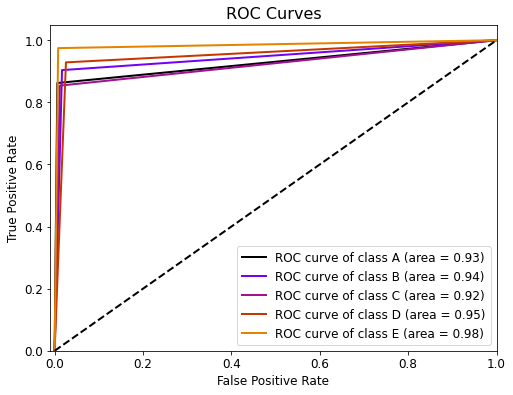

In [22]:
skplt.metrics.plot_roc(y_true=y_test, y_probas=dtree_probs, figsize=(8,6), cmap = 'gnuplot', text_fontsize=12,
                       title_fontsize=16,plot_micro=False,plot_macro=False)
plt.xlim(-0.01,1)
plt.show()